In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [58]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import patches
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from utils import from_feather

In [4]:
rcParams['figure.figsize'] = (10, 8)
rcParams['font.size'] = 16

In [5]:
x_trn, y_trn, x_tst = from_feather('x_trn', 'y_trn', 'x_tst')

In [6]:
x_trn.sample(5)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
356383,2784,31,0.91992,0.36319,0.059170,0.135450,0.133100,0.052524,-0.275410,-2.11940,-1.40250,-17.2460
414922,3241,74,0.93181,0.33103,0.055119,0.138240,-0.006169,0.061615,-0.338420,2.31550,0.23716,-13.4290
163020,1273,76,0.20151,0.96760,0.149880,0.026050,-0.128580,-0.046225,-0.032251,2.29140,8.30190,-6.1306
307021,2398,77,0.59416,-0.79034,-0.114540,0.096022,-0.044961,-0.045833,0.024910,-4.39200,5.00870,-5.2084
142734,1115,14,0.59543,-0.78898,-0.113480,0.100480,0.152860,0.095192,-0.303570,0.76587,4.82430,-12.2740


In [7]:
y_trn.sample(5)

,series_id,group_id,surface
2591,2591,41,concrete
3173,3173,41,concrete
2131,2131,65,wood
171,171,1,tiled
155,155,13,fine_concrete


In [8]:
freq = (y_trn.surface
 .value_counts(normalize=True)
 .rename('freq')
 .reset_index()
 .rename(columns={'index': 'surface'}))

In [9]:
freq

,surface,freq
0,concrete,0.204462
1,soft_pvc,0.192126
2,wood,0.159318
3,tiled,0.134908
4,fine_concrete,0.095276
5,hard_tiles_large_space,0.080840
6,soft_tiles,0.077953
7,carpet,0.049606
8,hard_tiles,0.005512


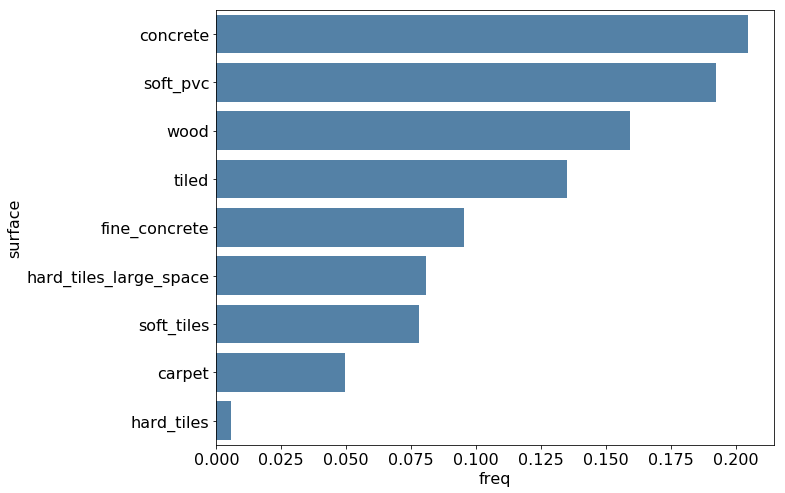

In [10]:
ax = sns.barplot(x='freq', y='surface', color='steelblue', data=freq)

In [11]:
cnt = (y_trn
       .groupby('group_id')
       .surface
       .value_counts()
       .rename('count')
       .reset_index()
       .sort_values(by='surface'))

In [12]:
group, surface, count = cnt['group_id'], cnt['surface'], cnt['count']

In [13]:
xs = list(range(len(cnt)))

In [14]:
uniq_surf = set(surface)
pal = sns.color_palette(n_colors=len(uniq_surf))
colors_map = dict(zip(uniq_surf, pal))
colors = [colors_map[surf] for surf in surface]

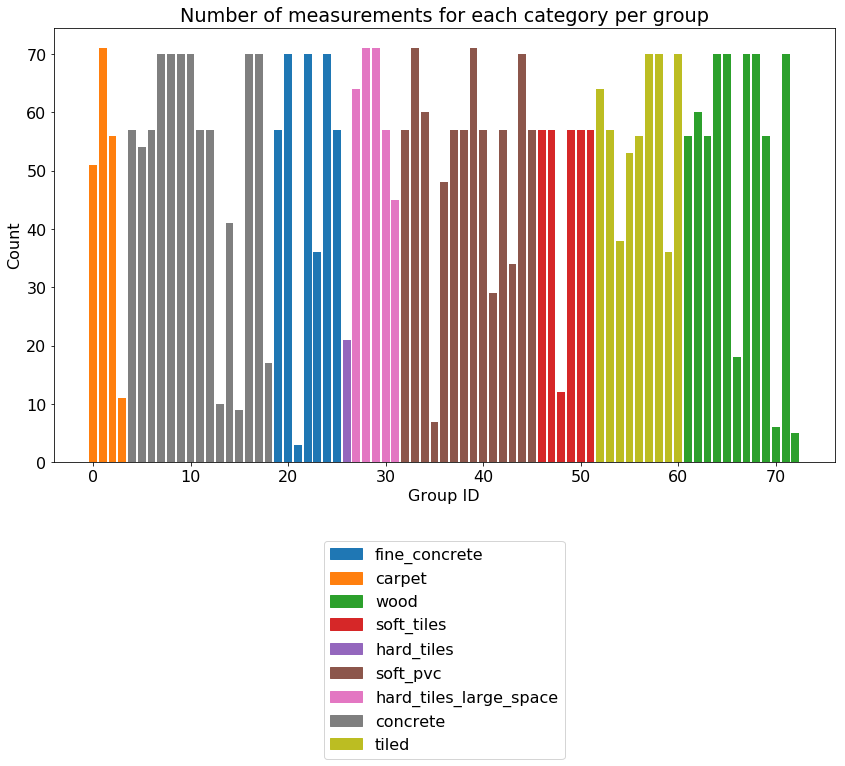

In [28]:
f, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.bar(x=xs, height=count, color=colors)
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.7),
    handles=[patches.Patch(color=c, label=s) for s, c in colors_map.items()])
ax.set_xlabel('Group ID')
ax.set_ylabel('Count')
_ = ax.set_title('Number of measurements for each category per group')

In [81]:
xy_trn = pd.merge(
    x_trn, y_trn,
    how='left',
    left_on='series_id', right_on='series_id',
    suffixes=['', '.y'])

In [50]:
surf_groups = xy_trn.groupby('surface')

In [85]:
x_trn.columns

Index(['series_id', 'measurement_number', 'orientation_X', 'orientation_Y',
       'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')

In [71]:
def line_plot(surf_groups, feature, **params):
    f, ax = plt.subplots(1, 1, figsize=(12, 8))
    for surf, group in surf_groups:
        sns.lineplot(x='measurement_number', y=feature, data=group, ax=ax, label=surf, **params)
    ax.set_title(f'Feature [{feature}] vs. Surface Type')
    ax.set_xlabel('Measurement No.')
    ax.set_ylabel('Value')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7))

/home/ck/anaconda3/envs/fastai/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


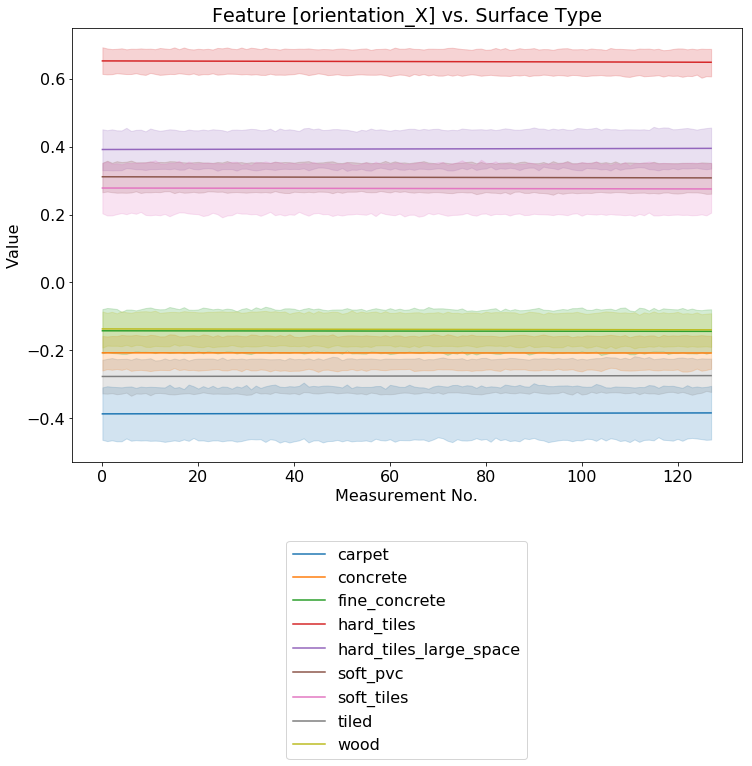

In [64]:
line_plot(surf_groups, 'orientation_X')

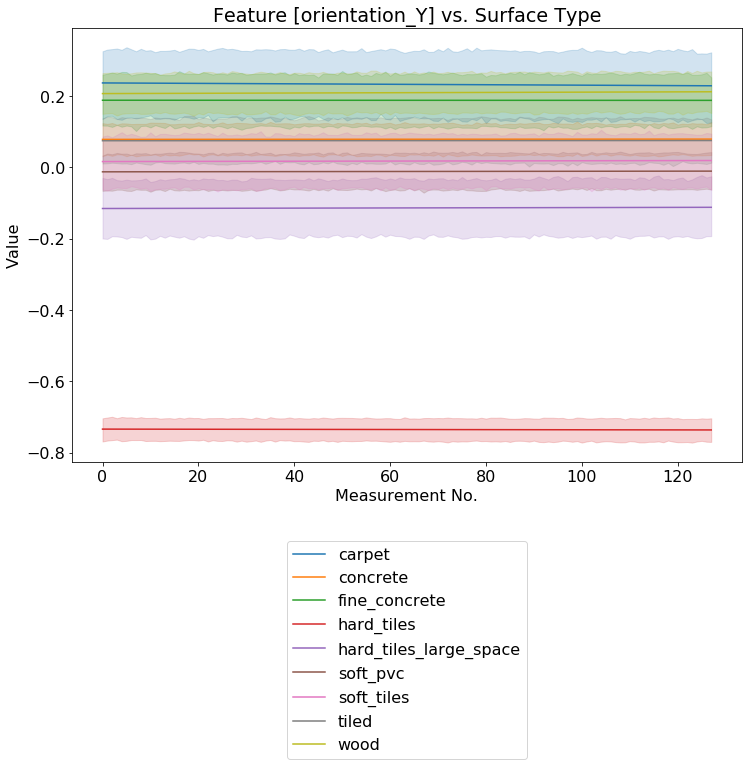

In [65]:
line_plot(surf_groups, 'orientation_Y')

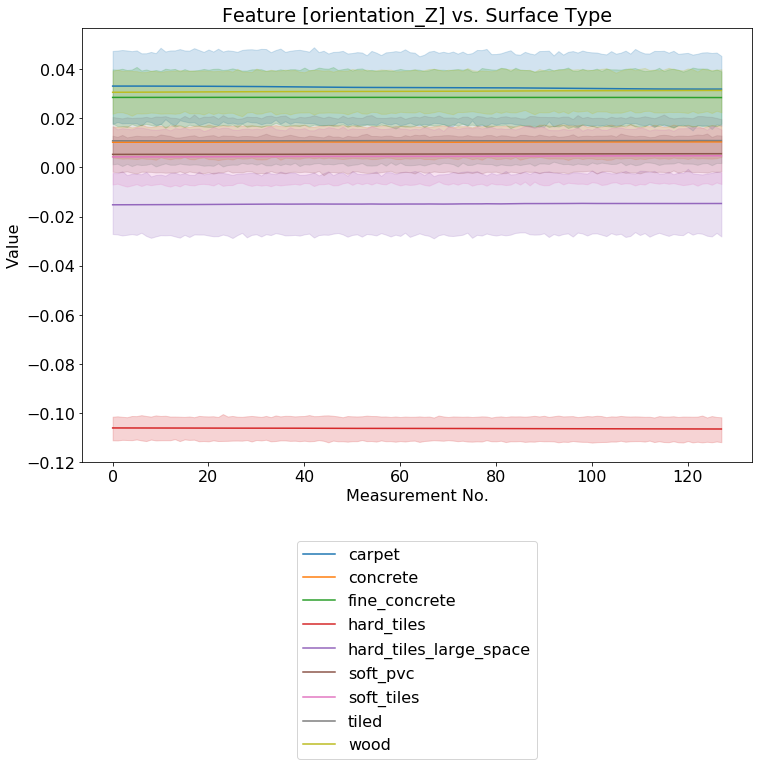

In [66]:
line_plot(surf_groups, 'orientation_Z')

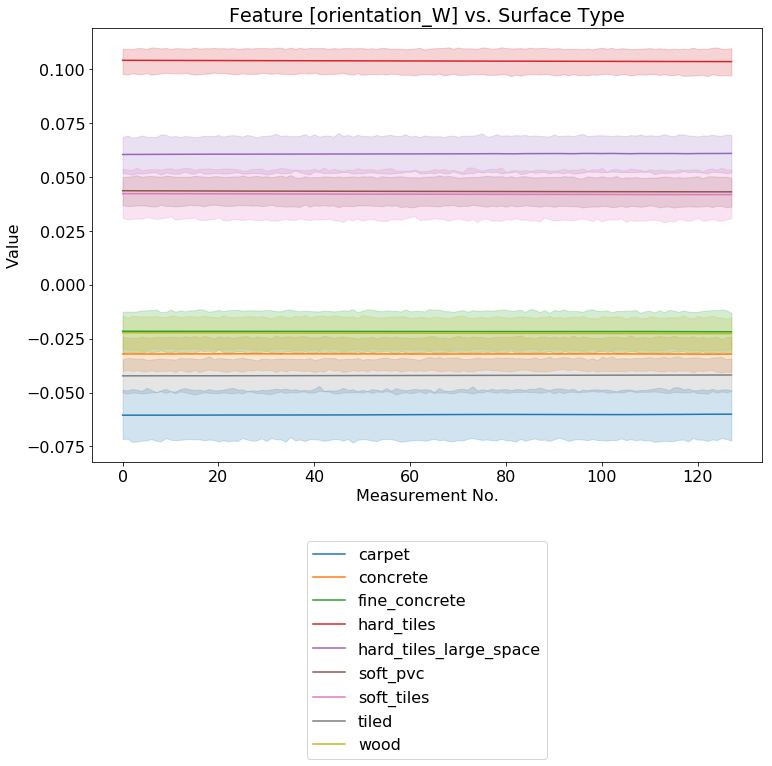

In [67]:
line_plot(surf_groups, 'orientation_W')

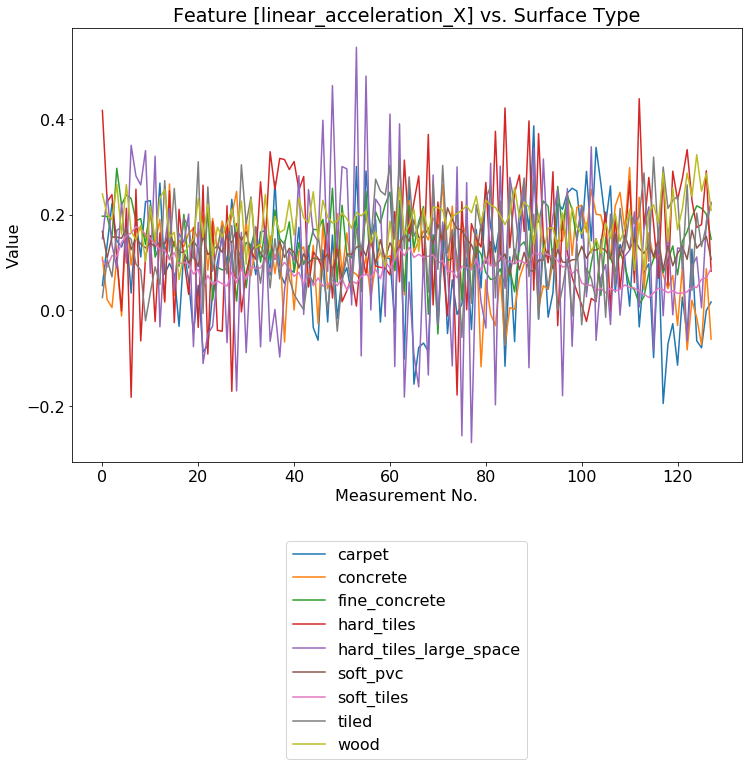

In [72]:
line_plot(surf_groups, 'linear_acceleration_X', ci=None)

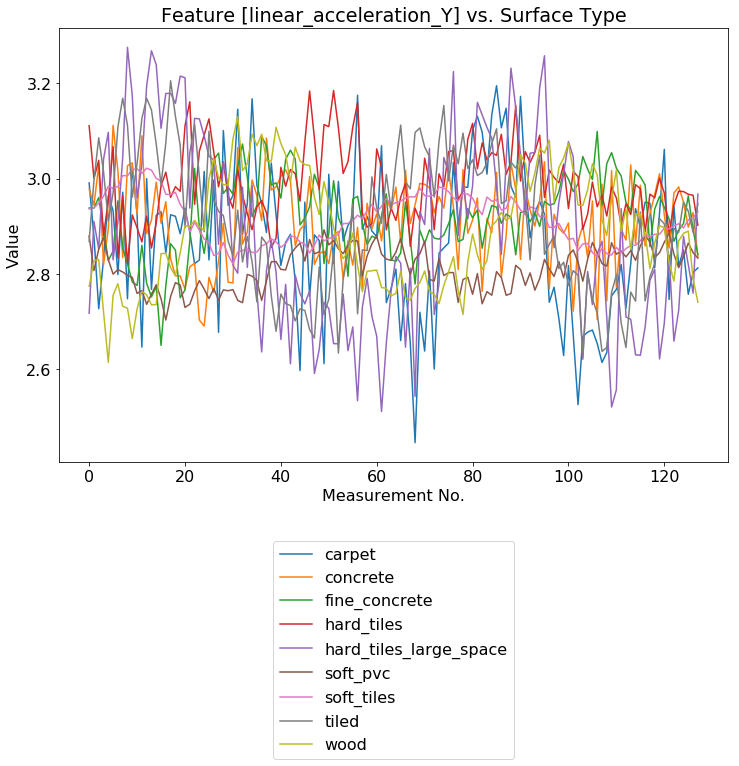

In [73]:
line_plot(surf_groups, 'linear_acceleration_Y', ci=None)

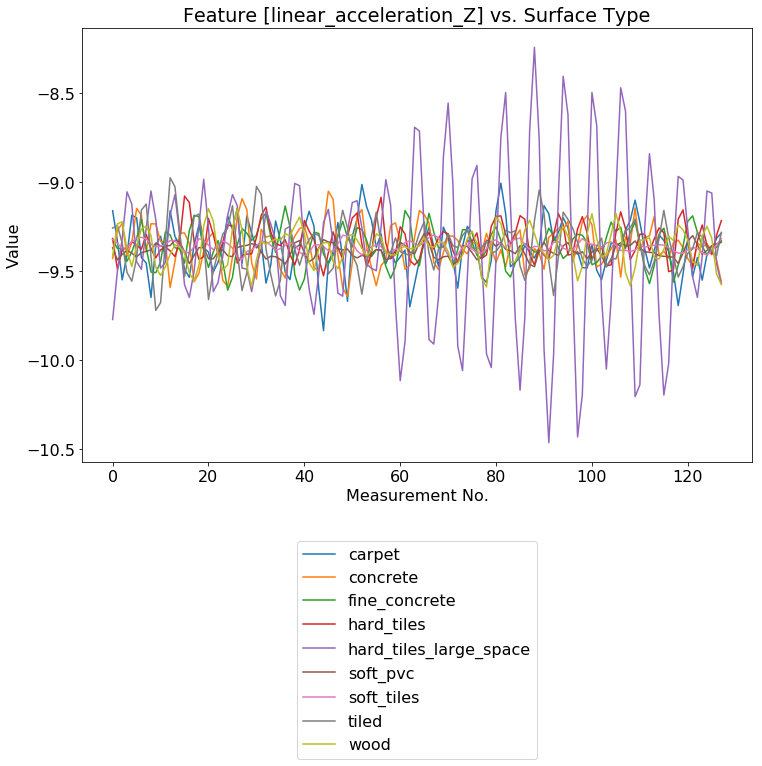

In [74]:
line_plot(surf_groups, 'linear_acceleration_Z', ci=None)

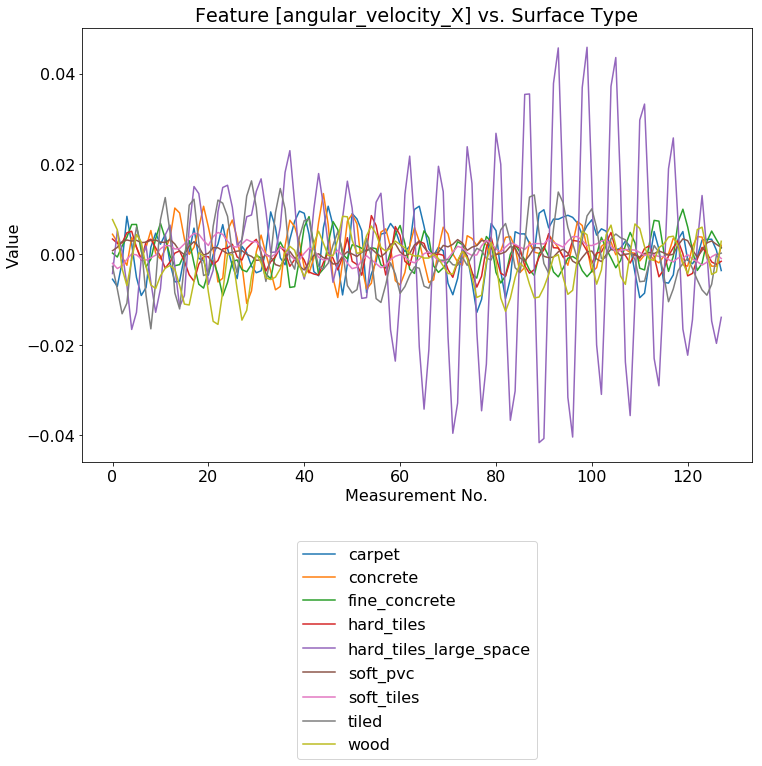

In [76]:
line_plot(surf_groups, 'angular_velocity_X', ci=None)

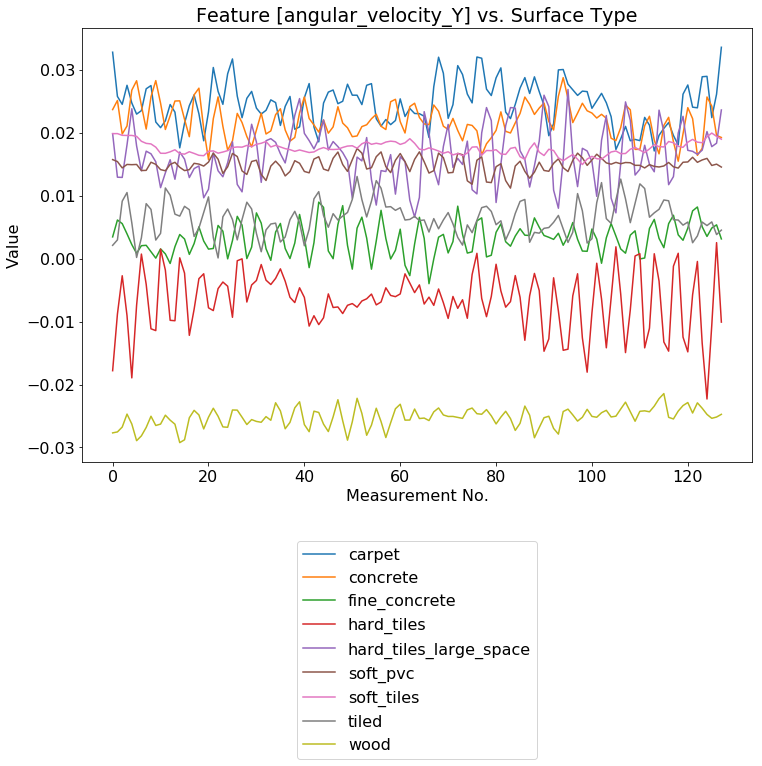

In [77]:
line_plot(surf_groups, 'angular_velocity_Y', ci=None)

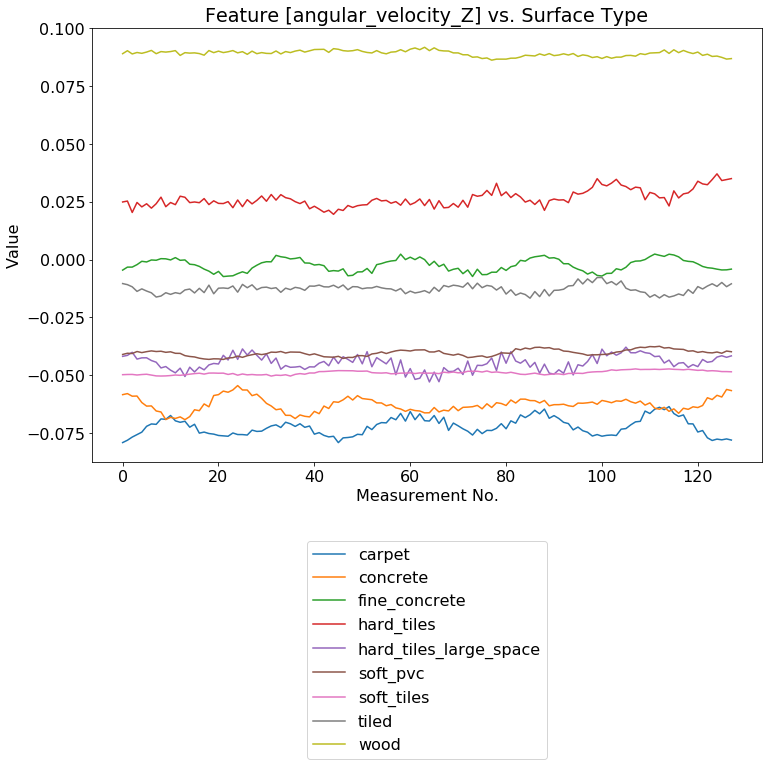

In [80]:
line_plot(surf_groups, 'angular_velocity_Z', ci=None)

In [91]:
wide = pd.melt(xy_trn, id_vars=['series_id', 'measurement_number', 'surface'], var_name='feature')

In [94]:
wide.head(20)

,series_id,measurement_number,surface,feature,value
0,0,0,fine_concrete,orientation_X,-0.75853
1,0,1,fine_concrete,orientation_X,-0.75853
2,0,2,fine_concrete,orientation_X,-0.75853
3,0,3,fine_concrete,orientation_X,-0.75852
4,0,4,fine_concrete,orientation_X,-0.75852
5,0,5,fine_concrete,orientation_X,-0.75853
6,0,6,fine_concrete,orientation_X,-0.75853
7,0,7,fine_concrete,orientation_X,-0.75852
8,0,8,fine_concrete,orientation_X,-0.75851
9,0,9,fine_concrete,orientation_X,-0.75851


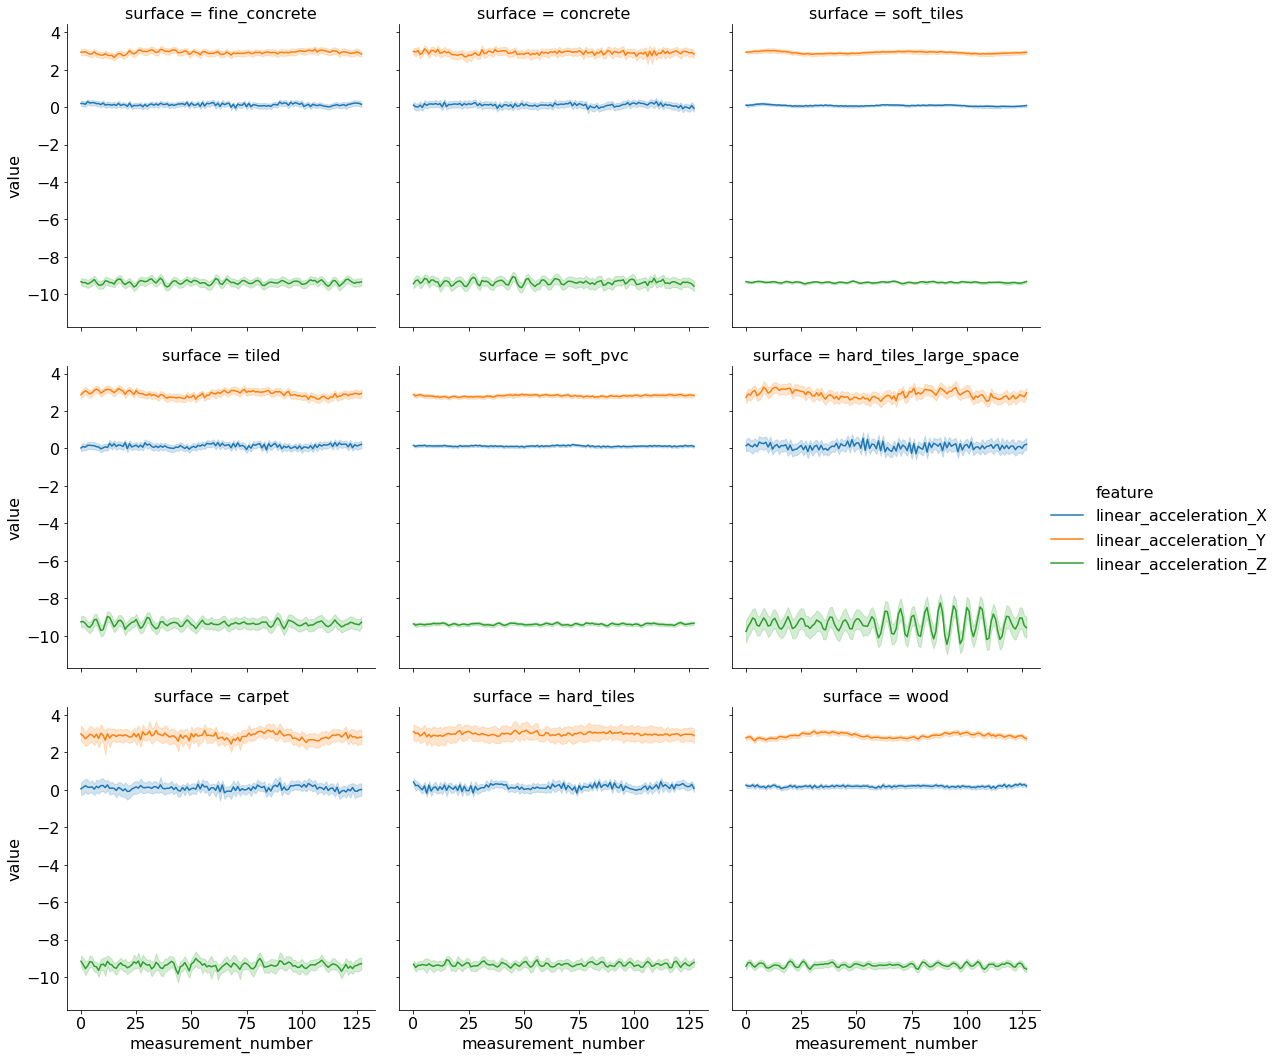

In [99]:
sns.relplot(x='measurement_number', y='value', hue='feature',
            kind='line', col='surface', 
            col_wrap=3, data=wide[wide.feature.str.startswith('linear')])

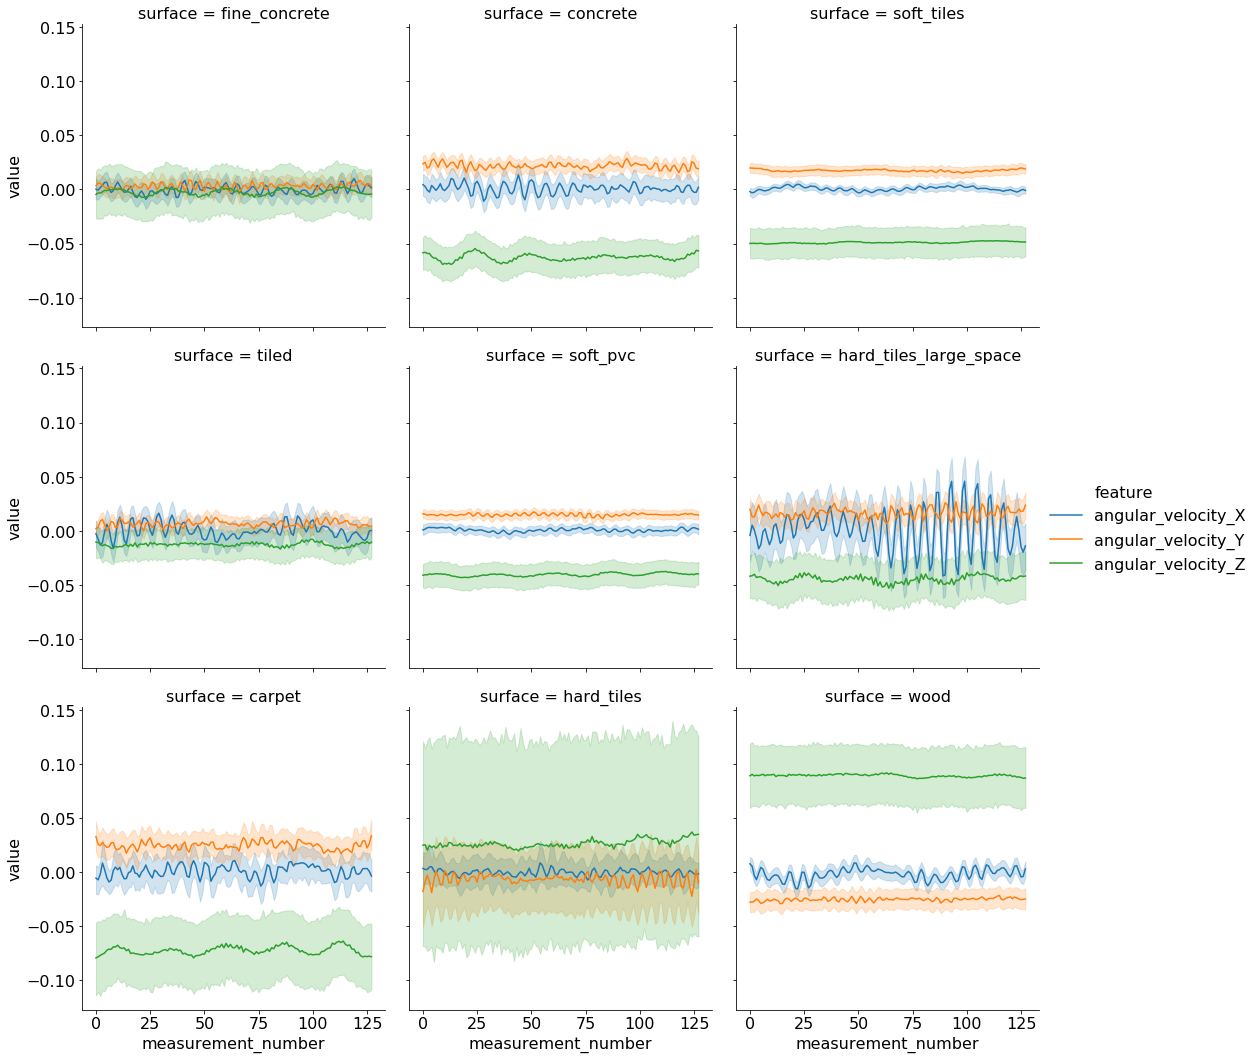

In [100]:
sns.relplot(x='measurement_number', y='value', hue='feature',
            kind='line', col='surface', 
            col_wrap=3, data=wide[wide.feature.str.startswith('angular')])

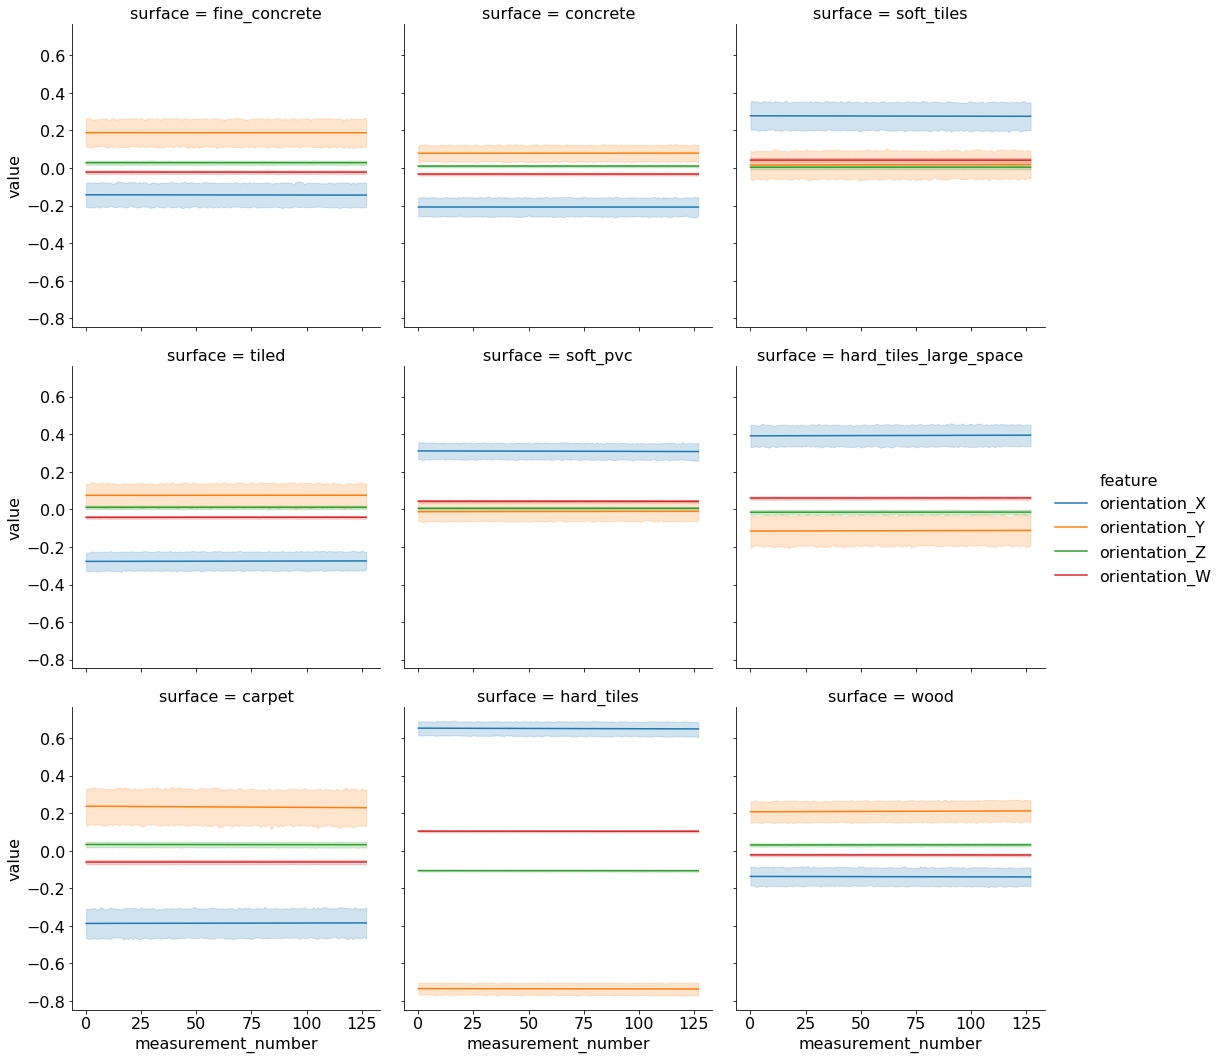

In [101]:
sns.relplot(x='measurement_number', y='value', hue='feature',
            kind='line', col='surface', 
            col_wrap=3, data=wide[wide.feature.str.startswith('orient')])